In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel('Data_Train.xlsx')
pd.set_option('display.max_columns', None)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.describe(include ='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


no missing values, now we will study and clean each filter one by one, price is also in reasonable range, no outliers in price

In [4]:
(df.isnull().sum()/df.shape[0])*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [5]:
df.dropna(inplace= True)

In [6]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot: xlabel='Airline'>

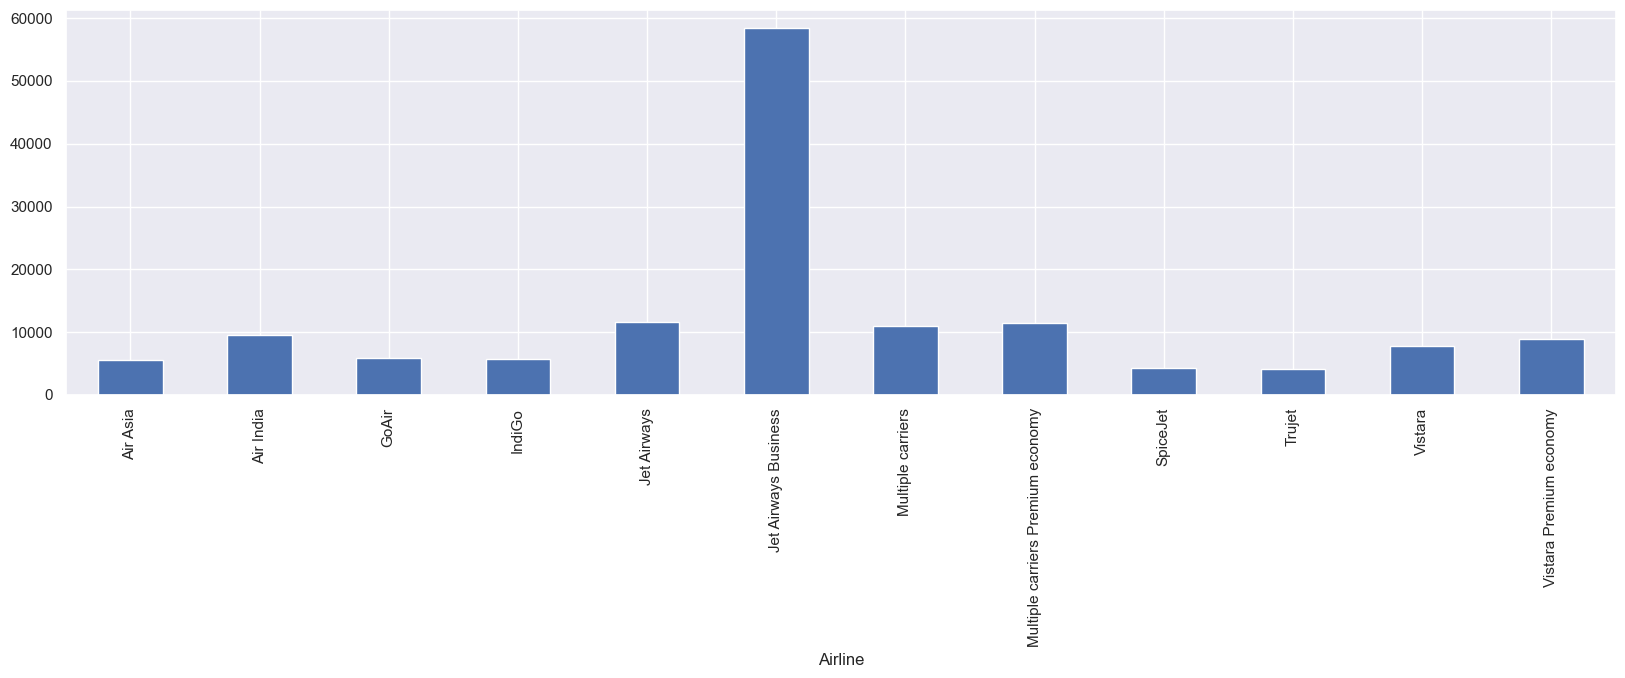

In [7]:
# we will show the airline vs average price
# df.set_index('Airline', inplace=True)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
df.groupby('Airline')['Price'].mean().plot.bar()

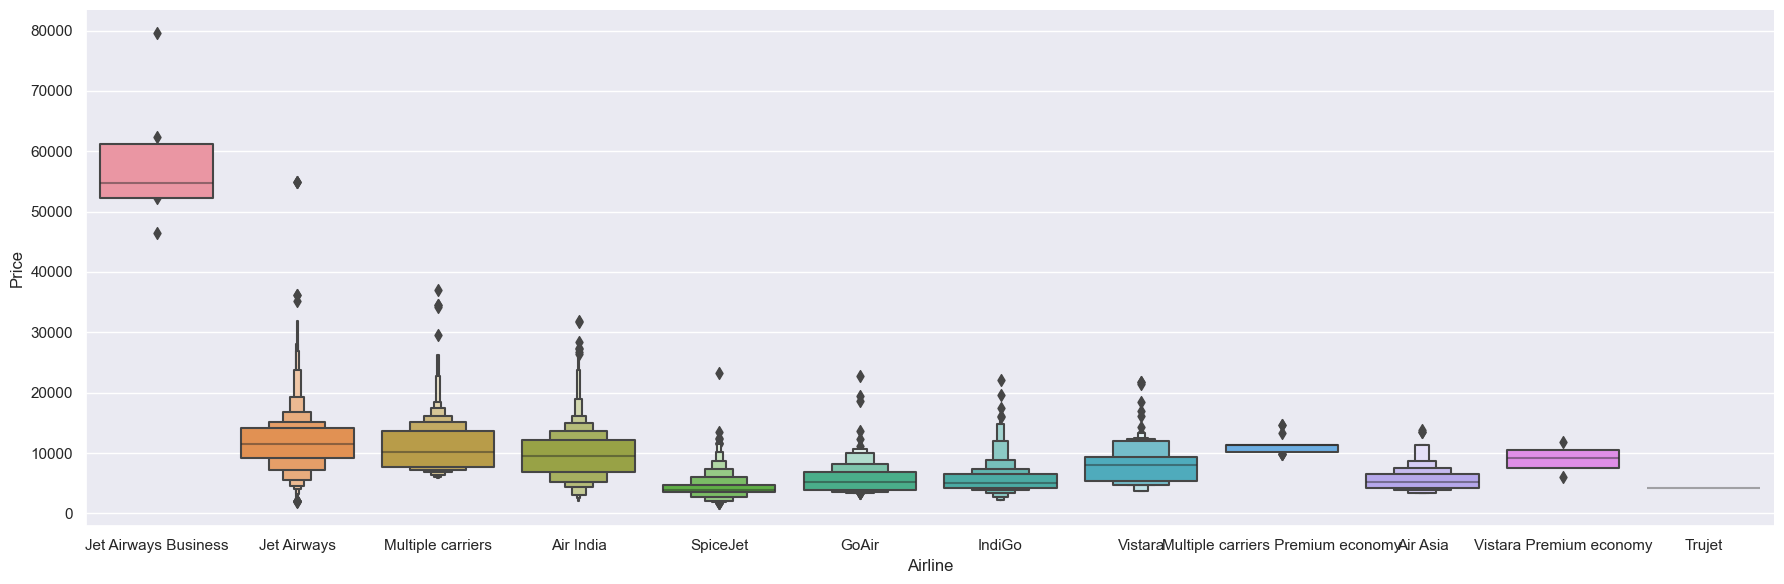

In [8]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [9]:
print(df.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


jet airways business have very high price

In [10]:
# stop

In [11]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [12]:
df.replace({"New Delhi": 'Delhi','No Info': 'No info'}, inplace = True)

In [13]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [14]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [15]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648


In [16]:
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [17]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,0,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,0,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,180,0,No info,7229
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,11:30,14:10,160,0,No info,12648


In [18]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64



make route by removing arrow, then make set

In [19]:
df['week'] = df['Date_of_Journey'].dt.day_name()
df['month'] = df['Date_of_Journey'].dt.month_name()

In [20]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,week,month
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897,Sunday,March
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662,Saturday,January
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882,Friday,September
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218,Thursday,December
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,0,No info,4107,Wednesday,September
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,0,No info,4145,Saturday,April
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,180,0,No info,7229,Saturday,April
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,11:30,14:10,160,0,No info,12648,Thursday,January


In [21]:
df.Dep_Time.str.len ().max ()

5

In [22]:
df.Arrival_Time.str.len ().max ()  # formate is corrected to get time only

12

In [23]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x: (x[:5]))

In [24]:
df['Dep_hour'] = df['Dep_Time'].apply(lambda x: int(x[:2]))
df['Arr_hour'] = df['Arrival_Time'].apply(lambda x: int(x[:2]))



In [25]:
df['Dep_Time'] = df['Dep_Time'].str.replace(":", '').astype(int)
df['Arrival_Time'] = df['Arrival_Time'].str.replace(":", '').astype(int)

In [26]:
# df = df.drop(['Arrival_Time', 'Dep_Time'], axis=1)

In [27]:
df['Additional_Info'].value_counts() # we will do one hot encoding

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [28]:
# df['Route'] = df['Route'].astype(str)
# df['Route'] = df['Route'].str.replace(" → ",' ')

In [29]:
# df['Route'] = df['Route'].apply(set)
#  applying to set is not reducing the number of different route

In [30]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,week,month,Dep_hour,Arr_hour
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2220,110,170,0,No info,3897,Sunday,March,22,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,550,1315,445,2,No info,7662,Saturday,January,5,13
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,925,425,1140,2,No info,13882,Friday,September,9,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1805,2330,325,1,No info,6218,Thursday,December,18,23
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,1650,2135,285,1,No info,13302,Thursday,January,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,1955,2225,150,0,No info,4107,Wednesday,September,19,22
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2045,2320,155,0,No info,4145,Saturday,April,20,23
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,820,1120,180,0,No info,7229,Saturday,April,8,11
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,1130,1410,160,0,No info,12648,Thursday,January,11,14


In [31]:
# df['Route'].value_counts()

In [32]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# df['route_counts'] = vectorizer.fit_transform(df['Route']).toarray().tolist()
# df


In [33]:
# # we have to apply count vectorizer to handle text values
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(df['Route'])
# df_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
# df = df.reset_index(drop=True)
# df = pd.concat([df, df_counts], axis=1)


In [34]:
# now we will apply dummy variable and remove extra features
df = pd.get_dummies(df, columns=['Airline'], prefix='', drop_first=False)
df = pd.get_dummies(df, columns=['Source'], prefix='source', drop_first=False)
df = pd.get_dummies(df, columns=['week'], prefix='', drop_first=False)
df = pd.get_dummies(df, columns=['Destination'], prefix='', drop_first=False)
df = pd.get_dummies(df, columns=['month'], prefix='', drop_first=False)
df = pd.get_dummies(df, columns=['Additional_Info'], prefix='', drop_first=False)
# df = pd.get_dummies(df, columns=['Dep_hour'], prefix='d', drop_first=True)
# df = pd.get_dummies(df, columns=['Arr_hour'], prefix='a', drop_first=True)

In [35]:
df.columns

Index(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Price', 'Dep_hour', 'Arr_hour', '_Air Asia',
       '_Air India', '_GoAir', '_IndiGo', '_Jet Airways',
       '_Jet Airways Business', '_Multiple carriers',
       '_Multiple carriers Premium economy', '_SpiceJet', '_Trujet',
       '_Vistara', '_Vistara Premium economy', 'source_Banglore',
       'source_Chennai', 'source_Delhi', 'source_Kolkata', 'source_Mumbai',
       '_Friday', '_Monday', '_Saturday', '_Sunday', '_Thursday', '_Tuesday',
       '_Wednesday', '_Banglore', '_Cochin', '_Delhi', '_Hyderabad',
       '_Kolkata', '_April', '_December', '_January', '_June', '_March',
       '_May', '_September', '_1 Long layover', '_1 Short layover',
       '_2 Long layover', '_Business class', '_Change airports',
       '_In-flight meal not included', '_No check-in baggage included',
       '_No info', '_Red-eye flight'],
      dtype='object')

In [36]:
df = df.drop(['Date_of_Journey', 'Route'], axis=1)

In [37]:

df.to_excel('processed_train.xlsx', index=False)